In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [28]:
import sklearn
sklearn.__version__

'1.3.0'

## Load Data

In [2]:
df_train = pd.read_parquet('POC_1.parquet.gzip')
df_test = pd.read_parquet('POC_2.parquet.gzip')

pip install faker


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469333 entries, 0 to 1469332
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   index            1469333 non-null  int64              
 1   timestamp_TW     1469333 non-null  datetime64[ns, UTC]
 2   uuid             1469333 non-null  category           
 3   ucid             1469333 non-null  category           
 4   upid             1469333 non-null  category           
 5   is_correct       1469333 non-null  int8               
 6   total_sec_taken  1469333 non-null  int16              
 7   difficulty       1469333 non-null  category           
 8   level            1469333 non-null  int8               
 9   user_grade       1469333 non-null  int8               
 10  categories       1469333 non-null  category           
 11  upid_rating      1469333 non-null  float64            
 12  uuid_rating      1469333 non-null  float64

In [4]:
df_train.head()

,index,timestamp_TW,uuid,ucid,upid,is_correct,total_sec_taken,difficulty,level,user_grade,categories,upid_rating,uuid_rating,rating_diff
0,0,2018-08-01 08:45:00+00:00,Dhn54baDrxJBK7IyBdgtfSRQQCHT3PviTmZmW5/cpOs=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,olh67LOGFzqbJDHh3UDgsOCD7y93FkwcXlNdZd0cu6o=,1,11,easy,0,7,Arithmetic,1254.481514,1708.252626,453.771112
1,1,2018-08-01 08:45:00+00:00,Dhn54baDrxJBK7IyBdgtfSRQQCHT3PviTmZmW5/cpOs=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,d/+U7oCmCz3evMmyuuypbsAQTtwNMzgyPDI/QmrgCTM=,1,14,easy,0,7,Arithmetic,1333.894490,1708.730140,374.835650
2,2,2018-08-01 08:45:00+00:00,Dhn54baDrxJBK7IyBdgtfSRQQCHT3PviTmZmW5/cpOs=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,lhiVz5dgL8uN8YtsQQb5A+MKJ27jXhck6G11qRb6kVc=,1,8,easy,0,7,Arithmetic,975.373707,1709.472134,734.098427
3,3,2018-08-01 08:45:00+00:00,Dhn54baDrxJBK7IyBdgtfSRQQCHT3PviTmZmW5/cpOs=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,n6yxHe1SY9oitLpGqJpwydWuLjDEIFQ3CAq6qdrqZng=,1,21,easy,0,7,Arithmetic,1479.225263,1709.569085,230.343823
4,4,2018-08-01 08:45:00+00:00,Dhn54baDrxJBK7IyBdgtfSRQQCHT3PviTmZmW5/cpOs=,tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,RsfaW0a4EltsJOnMUSnY+BD/x+hqpBlpahagZVWmylc=,1,28,easy,1,7,Arithmetic,1411.927189,1711.195438,299.268248


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161296 entries, 0 to 161295
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   index            161296 non-null  int64              
 1   timestamp_TW     161296 non-null  datetime64[ns, UTC]
 2   uuid             161296 non-null  category           
 3   ucid             161296 non-null  category           
 4   upid             161296 non-null  category           
 5   is_correct       161296 non-null  int8               
 6   total_sec_taken  161296 non-null  int16              
 7   difficulty       161296 non-null  category           
 8   level            161296 non-null  int8               
 9   user_grade       161296 non-null  int8               
 10  categories       161296 non-null  category           
 11  upid_rating      161296 non-null  float64            
 12  uuid_rating      161296 non-null  float64            
 13 

In [6]:
df_test.head()

,index,timestamp_TW,uuid,ucid,upid,is_correct,total_sec_taken,difficulty,level,user_grade,categories,upid_rating,uuid_rating,rating_diff
0,2718582,2019-07-01 00:00:00+00:00,JxV+ARlA+d4cm5JqTF/WsdVX6Zg5K8UgKEuA7JD16bU=,bcVaSTFMr4RK9JPKGqEq+y6uMvBtTET8i7vhnwCQTpA=,Wi57Ejde8t/gaUOJOisEVuKxOp42nHWxTUXePVOXuQU=,1,18,easy,1,6,Arithmetic,1392.271482,1626.310510,234.039028
1,2718583,2019-07-01 00:00:00+00:00,JxV+ARlA+d4cm5JqTF/WsdVX6Zg5K8UgKEuA7JD16bU=,bcVaSTFMr4RK9JPKGqEq+y6uMvBtTET8i7vhnwCQTpA=,fe/+kjhrQxUbBcpk0Cg6eV+lnTONFNG+ei2qnEXp4v8=,0,19,easy,1,6,Arithmetic,1841.729623,1627.905363,-213.824261
2,2718584,2019-07-01 00:00:00+00:00,JxV+ARlA+d4cm5JqTF/WsdVX6Zg5K8UgKEuA7JD16bU=,bcVaSTFMr4RK9JPKGqEq+y6uMvBtTET8i7vhnwCQTpA=,cSEJBqoj3mO8xq4h8ZAt8C+Y8M8g6FEbAxqvlpiCfY0=,1,261,easy,1,6,Arithmetic,1669.979109,1618.565696,-51.413413
3,2718585,2019-07-01 00:00:00+00:00,JxV+ARlA+d4cm5JqTF/WsdVX6Zg5K8UgKEuA7JD16bU=,bcVaSTFMr4RK9JPKGqEq+y6uMvBtTET8i7vhnwCQTpA=,/gqPqMfdqNcpaS4hvYe4oTEzxeKi7XRL1rX7JHCcRuk=,0,14,easy,1,6,Arithmetic,1557.483485,1624.754862,67.271377
4,2718586,2019-07-01 00:00:00+00:00,JxV+ARlA+d4cm5JqTF/WsdVX6Zg5K8UgKEuA7JD16bU=,bcVaSTFMr4RK9JPKGqEq+y6uMvBtTET8i7vhnwCQTpA=,XSR1+P2LXXMQvgh6wQKSqUPq9KQW/SgFZkuNcV6U6XU=,0,8,easy,1,6,Arithmetic,1680.939469,1608.445749,-72.493720


In [3]:
columns_to_drop = ['index', 'timestamp_TW', 'ucid', 'total_sec_taken', 'categories']

# Drop columns from df_train
existing_columns_to_drop_train = [col for col in columns_to_drop if col in df_train.columns]
df_train.drop(columns=existing_columns_to_drop_train, inplace=True)

# Drop columns from df_test
existing_columns_to_drop_test = [col for col in columns_to_drop if col in df_test.columns]
df_test.drop(columns=existing_columns_to_drop_test, inplace=True)


In [4]:
numeric_features = df_train.select_dtypes(include=['int64','int8', 'float64']).columns
numeric_features

Index(['is_correct', 'level', 'user_grade', 'upid_rating', 'uuid_rating',
       'rating_diff'],
      dtype='object')

In [5]:
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['uuid', 'upid', 'difficulty'], dtype='object')

In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

xgb.__version__

'2.0.3'

In [7]:
X = df_train.drop(columns=['is_correct'])
y = df_train['is_correct']

In [8]:
# Fitur numerik termasuk semua kolom kecuali target
numeric_features_with_rating = ['upid_rating', 'uuid_rating', 'rating_diff', 'level', 'user_grade']
numeric_features_without_rating = ['level', 'user_grade']

# Fitur kategorikal
categorical_features = ['difficulty']



In [9]:
# Menghitung persentase is_correct 
is_correct_counts = df_train['is_correct'].value_counts(normalize=True) * 100
is_correct_counts


is_correct
1    71.088038
0    28.911962
Name: proportion, dtype: float64

## Without Rating

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Pipeline tanpa kolom rating
preprocessor_without_rating = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_without_rating),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Buat pipeline dengan preprocessor dan model XGBoost (tanpa rating)
pipeline_without_rating = Pipeline(steps=[
    ('preprocessor', preprocessor_without_rating),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

In [12]:
# Latih model tanpa hyperparameter tuning (tanpa rating)
pipeline_without_rating.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['level', 'user_grade']),
                                                 ('cat', OneHotEncoder(),
                                                  ['difficulty'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [13]:
X_test = df_test.drop(columns=['is_correct'])
y_test = df_test['is_correct']

In [14]:
y_test_pred_without_rating = pipeline_without_rating.predict(X_test)
y_test_pred_proba_without_rating = pipeline_without_rating.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Menghitung metrik evaluasi
test_accuracy_without_rating = accuracy_score(y_test, y_test_pred_without_rating)
test_precision_without_rating = precision_score(y_test, y_test_pred_without_rating)
test_recall_without_rating = recall_score(y_test, y_test_pred_without_rating)
test_f1_without_rating = f1_score(y_test, y_test_pred_without_rating)
test_roc_auc_without_rating = roc_auc_score(y_test, y_test_pred_proba_without_rating)

print(f'Test Accuracy without rating: {test_accuracy_without_rating}')
print(f'Test Precision without rating: {test_precision_without_rating}')
print(f'Test Recall without rating: {test_recall_without_rating}')
print(f'Test F1 Score without rating: {test_f1_without_rating}')
print(f'Test ROC AUC without rating: {test_roc_auc_without_rating}')

Test Accuracy without rating: 0.7467761134808055
Test Precision without rating: 0.7470217412885932
Test Recall without rating: 0.9994023309094532
Test F1 Score without rating: 0.8549759263730489
Test ROC AUC without rating: 0.6543520130777709


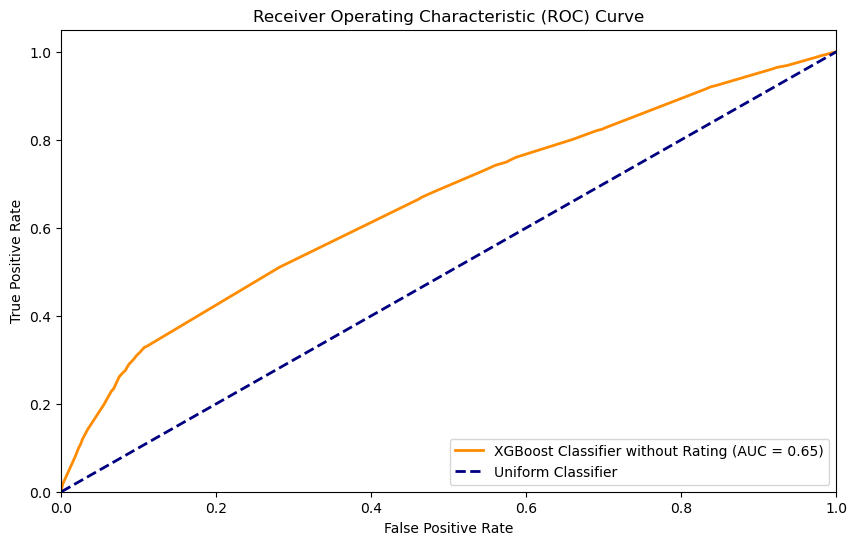

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Menghitung kurva ROC untuk model tanpa rating
fpr_without, tpr_without, _ = roc_curve(y_test, y_test_pred_proba_without_rating)
roc_auc_without = auc(fpr_without, tpr_without)

# Plot kurva ROC 
plt.figure(figsize=(10, 6))
plt.plot(fpr_without, tpr_without, color='darkorange', lw=2, label='XGBoost Classifier without Rating (AUC = {:.2f})'.format(roc_auc_without))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Uniform Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
import pickle

with open('xgboost_nr_pipe_local.pkl', 'wb') as file:
    pickle.dump(pipeline_without_rating, file)

XGBoost without rating model had AUC of 0.65, indicating moderate ability to differentiate between positive and negative classes.

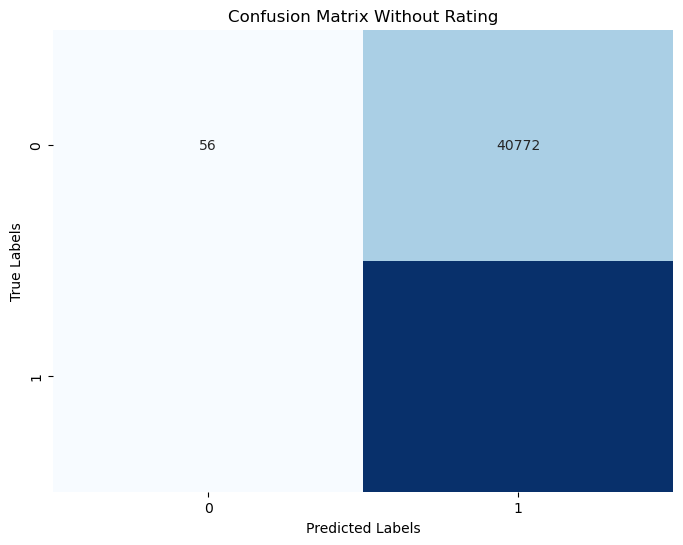

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix untuk model tanpa rating
cm_without = confusion_matrix(y_test, y_test_pred_without_rating)

# Visualisasi confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_without, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Without Rating')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

- Class Imbalance: The model shows a very strong bias towards the positive class. Considering that most is_correct values ​​are 1 (71.09%), this can be considered reasonable. However, this also indicates that the model is unbalanced and may require addressing class imbalance to improve performance in detecting negative classes.

- Class Imbalance Handling: To improve performance, we may need to consider class imbalance handling techniques.

## With Rating

In [18]:
# Preprocessing pipeline dengan kolom rating
preprocessor_with_rating = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_with_rating),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [19]:
# Buat pipeline dengan preprocessor dan model XGBoost (dengan rating)
pipeline_with_rating = Pipeline(steps=[
    ('preprocessor', preprocessor_with_rating),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Latih model dengan kolom rating dan fitur kategorikal
pipeline_with_rating.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['upid_rating', 'uuid_rating',
                                                   'rating_diff', 'level',
                                                   'user_grade']),
                                                 ('cat', OneHotEncoder(),
                                                  ['difficulty'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               ear...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [24]:
y_test_pred_with_rating = pipeline_with_rating.predict(X_test)
y_test_pred_proba_with_rating = pipeline_with_rating.predict_proba(X_test)[:, 1]

y_train_pred_with_rating = pipeline_with_rating.predict(X)
y_train_pred_proba_with_rating = pipeline_with_rating.predict_proba(X)[:, 1]

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Menghitung metrik evaluasi
train_accuracy_with_rating = accuracy_score(y, y_train_pred_with_rating)
train_precision_with_rating = precision_score(y, y_train_pred_with_rating)
train_recall_with_rating = recall_score(y, y_train_pred_with_rating)
train_f1_with_rating = f1_score(y, y_train_pred_with_rating)
train_roc_auc_with_rating = roc_auc_score(y, y_train_pred_proba_with_rating)

print(f'Test Accuracy with rating: {train_accuracy_with_rating}')
print(f'Test Precision with rating: {train_precision_with_rating}')
print(f'Test Recall with rating: {train_recall_with_rating}')
print(f'Test F1 Score with rating: {train_f1_with_rating}')
print(f'Test ROC AUC with rating: {train_roc_auc_with_rating}')

Test Accuracy with rating: 0.7805215019331901
Test Precision with rating: 0.8065788300433522
Test Recall with rating: 0.9093162409527822
Test F1 Score with rating: 0.8548718883391049
Test ROC AUC with rating: 0.8187862013754528


In [26]:
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Training Performance': [train_accuracy_with_rating, train_precision_with_rating, train_recall_with_rating, train_f1_with_rating, train_roc_auc_with_rating]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Set 'Metric' as the index
metrics_df.set_index('Metric', inplace=True)
metrics_df


,Training Performance
Metric,
Accuracy,0.780522
Precision,0.806579
Recall,0.909316
F1 Score,0.854872
ROC AUC,0.818786


In [27]:
metrics_df.to_parquet('train_performance.parquet.gzip')

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Menghitung metrik evaluasi
test_accuracy_with_rating = accuracy_score(y_test, y_test_pred_with_rating)
test_precision_with_rating = precision_score(y_test, y_test_pred_with_rating)
test_recall_with_rating = recall_score(y_test, y_test_pred_with_rating)
test_f1_with_rating = f1_score(y_test, y_test_pred_with_rating)
test_roc_auc_with_rating = roc_auc_score(y_test, y_test_pred_proba_with_rating)

print(f'Test Accuracy with rating: {test_accuracy_with_rating}')
print(f'Test Precision with rating: {test_precision_with_rating}')
print(f'Test Recall with rating: {test_recall_with_rating}')
print(f'Test F1 Score with rating: {test_f1_with_rating}')
print(f'Test ROC AUC with rating: {test_roc_auc_with_rating}')


Test Accuracy with rating: 0.799232467017161
Test Precision with rating: 0.8179895020324469
Test Recall with rating: 0.9404489158946774
Test F1 Score with rating: 0.8749551108039123
Test ROC AUC with rating: 0.8178338299945389


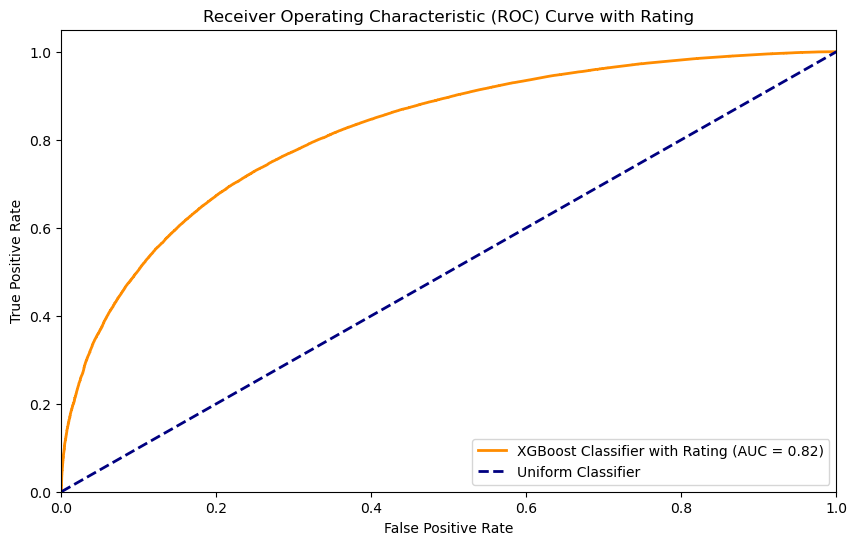

In [22]:
# Menghitung kurva ROC
fpr_with, tpr_with, _ = roc_curve(y_test, y_test_pred_proba_with_rating)
roc_auc_with = auc(fpr_with, tpr_with)

# Plot kurva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_with, tpr_with, color='darkorange', lw=2, label='XGBoost Classifier with Rating (AUC = {:.2f})'.format(roc_auc_with))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Uniform Classifier')

# Label n judul
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Rating')
plt.legend(loc="lower right")
plt.show()

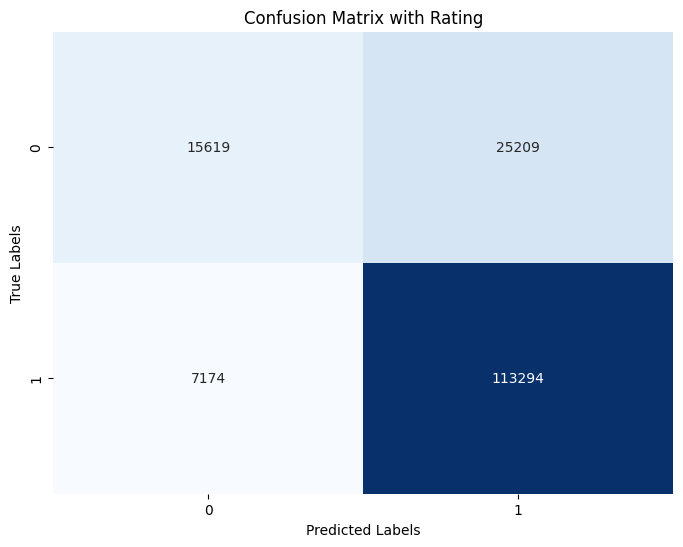

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion matrix untuk model dengan rating
cm_with = confusion_matrix(y_test, y_test_pred_with_rating)

# Visualisasi confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_with, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with Rating')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [28]:
model_with_rating = pipeline_with_rating.named_steps['classifier']
# feature importance dari model XGBoost
importance = model_with_rating.feature_importances_
feature_names = numeric_features_with_rating + list(pipeline_with_rating.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
# new df for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

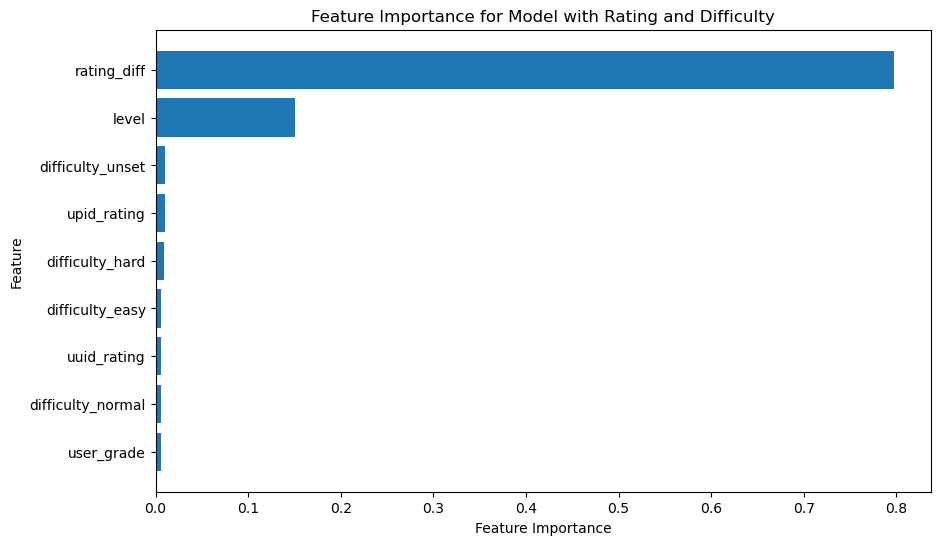

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Model with Rating and Difficulty')
plt.gca().invert_yaxis()
plt.show()

In [31]:
feature_importance_df

,Feature,Importance
2,rating_diff,0.797167
3,level,0.150844
8,difficulty_unset,0.010256
0,upid_rating,0.009599
6,difficulty_hard,0.009490
5,difficulty_easy,0.005944
1,uuid_rating,0.005840
7,difficulty_normal,0.005574
4,user_grade,0.005286


XYZ

## Conclusion

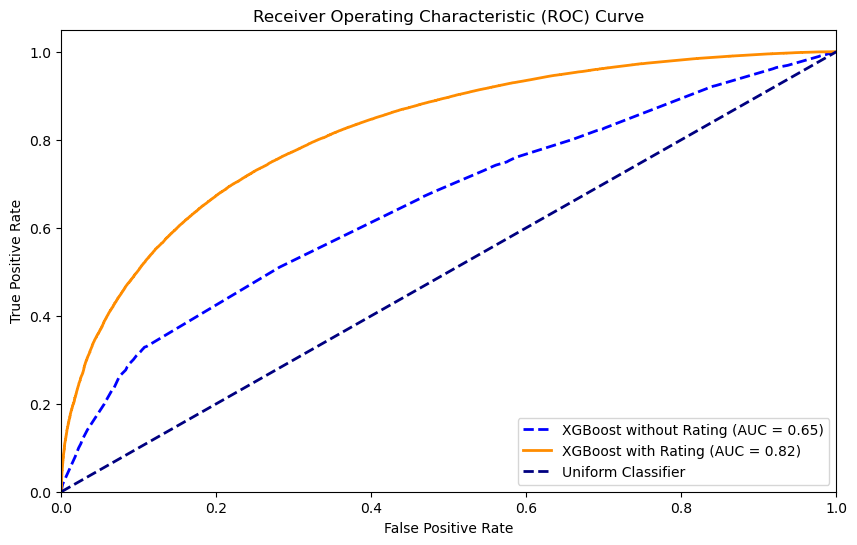

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_without, tpr_without, color='blue', lw=2, linestyle='--', label='XGBoost without Rating (AUC = {:.2f})'.format(roc_auc_without))
plt.plot(fpr_with, tpr_with, color='darkorange', lw=2, label='XGBoost with Rating (AUC = {:.2f})'.format(roc_auc_with))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Uniform Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

XYZ

In [32]:
import pickle

with open('xgboost_rating_local.pkl', 'wb') as file:
    pickle.dump(model_with_rating, file)

with open('xgboost_rating_pipe_local.pkl', 'wb') as file:
    pickle.dump(pipeline_with_rating, file)


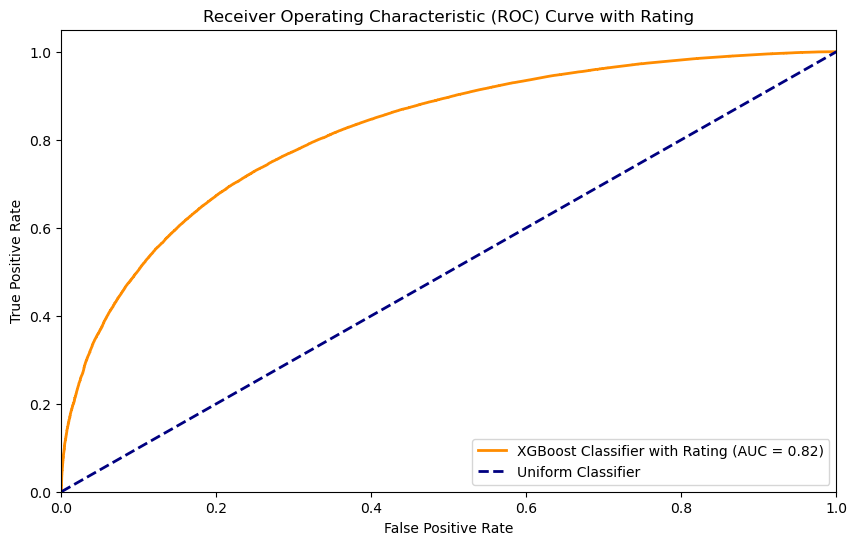

In [34]:
with open('xgboost_rating_pipe_local.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_test_pred_pkl = loaded_model.predict(X_test)
y_test_pred_proba_pkl = loaded_model.predict_proba(X_test)[:, 1]

fpr_with, tpr_with, _ = roc_curve(y_test, y_test_pred_proba_with_rating)
roc_auc_with = auc(fpr_with, tpr_with)

# Plot kurva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_with, tpr_with, color='darkorange', lw=2, label='XGBoost Classifier with Rating (AUC = {:.2f})'.format(roc_auc_with))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Uniform Classifier')

# Label n judul
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Rating')
plt.legend(loc="lower right")
plt.show()
